In [2]:
import sqlite3
import pandas as pd

db = sqlite3.connect('IMDB.sqlite')

cur = db.cursor()

In [7]:
earning = pd.read_sql_query('select * from earning' , db)
movie = pd.read_sql_query('select * from IMDB' , db)
genre = pd.read_sql_query('select * from genre' , db)

## IMDB Movie

Problem statement
IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.

Find the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database.

Print the rating of that movie.

Output Format:
rating



In [32]:
earning_data = earning

# Making a new column called 'total' for domestic+worldwide earnings
earning_data['total'] = earning_data['Domestic'] + earning_data['Worldwide']

# Using boolean algebra to select the row with max earnings
earning_data = earning_data[ earning_data.total == earning_data['total'].max()]

# extracting the movie_id from this row
movie_id = earning_data['Movie_id'].iloc[0]

# Using boolean algebra to select the row in movies table with our extracted movie id
movie_data = movie[movie.Movie_id == movie_id]

# extracting the rating
rating = movie_data['Rating'].iloc[0]
print(rating)


8.1


## Method-2

In [33]:
import pandas as pd 
import sqlite3
db = sqlite3.connect('IMDB.sqlite')
df  = pd.read_sql_query('select * from earning inner join IMDB on IMDB.Movie_id=earning.Movie_id',db)
df['Total'] = df['Domestic'] + df['Worldwide']
print(df[df['Total'].max()==df['Total']]['Rating'].values[0])

8.1


# IMDB VOTED

Problem statement
IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.

Find the most voted movie in IMDB Movie Database.

Print the movie name and the rating of that movie.

Output Format:
movie_name rating


In [37]:
movie_data = movie

# extracting row in movies table with max totalVotes
movie_data = movie_data[movie_data['TotalVotes'] == movie_data['TotalVotes'].max()]

# extracting name of movie
movie_id = movie_data['Movie_id'].values[0]

movie_name = movie_data['Title'].values[0]
rating = movie_data['Rating'].values[0]

print(movie_name , rating)

Inception (2010) 8.8


## Method - 2

Same question as above but in this we have to tell the genre of movie with most votes

In [41]:
# Joining the tables IMDB and genre using inner join and storing all values in a variable
imdb_genre = pd.read_sql_query('select * from IMDB inner join genre on IMDB.Movie_id = genre.Movie_id',db)

# selecting row with max votes in joint table
imdb_genre = imdb_genre[imdb_genre['TotalVotes'] == imdb_genre['TotalVotes'].max()]

# extracting name and genre 
name = imdb_genre['Title'].values[0]
genre = imdb_genre['genre'].values[0]

print(name,genre)

Inception (2010) Action


## IMDB Running time

Problem statement
IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.

Find the Movie with Longest-Running Time from IMDB Movie database.

Print the name of movie and running time as integer value.

Note: Don't print 'min' in running time. Output Format:
movie_name running_time


In [78]:
import numpy as np
movie_data = movie

# Creating a new column that only contains int part of runtime by splitting the runtime column
movie_data['Runtime(in mins)'] = movie_data['Runtime'].str.split(' ' , expand=True)[0]

# dropping the empty column which has been created for some reason
movie_data.drop('empty' , axis=1)

# Converting empty strings to NaN
movie_data['Runtime(in mins)'] = movie_data['Runtime(in mins)'].replace('', np.nan)

# Dropping rows with NaN values in the 'Runtime(in mins)' column
movie_data.dropna(subset=['Runtime(in mins)'], inplace=True)

# Converting the 'Runtime(in mins)' column to integers
movie_data['Runtime(in mins)'] = movie_data['Runtime(in mins)'].astype(int)

# selecting the row in imdb table with max runtime
movie_data = movie_data[movie_data['Runtime(in mins)'] == movie_data['Runtime(in mins)'].max()]

# extracting name and runtime from this row
name = movie_data['Title'].values[0]
runtime = movie_data['Runtime(in mins)'].values[0]

print(name,runtime)


The Wolf of Wall Street (2013) 180


## IMDB Profit

Problem statement
IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.

Find the movie which has maximum net profit in IMDB Movie Database.

Print the movie name.

Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget

Output Format:
movie_name



In [116]:
import numpy as np

# Joining IMDB and genre tables using inner join query
imdb_earning = pd.read_sql_query('select * from IMDB inner join earning on IMDB.Movie_id = earning.Movie_id',db)

# Replacing empty values in the 3 columns with Nan
imdb_earning[['Worldwide' , 'Domestic' , 'Budget']] = imdb_earning[['Worldwide' , 'Domestic' , 'Budget']].replace('' , np.nan)

# Dropping rows with Na values in these three columns
imdb_earning.dropna(subset=['Worldwide' , 'Domestic' , 'Budget'] , inplace=True)

# Still some Na values are present in budget column when we checked through isNull().sum() method.
# So we made those null values equal to 0 only in the budget column
# imdb_earning.loc[imdb_earning['Budget'].isnull() , 'Budget'] = 0

# Converting three columns at once to intergers so we can calculate profit later
imdb_earning[['Worldwide' , 'Domestic' , 'Budget']] = imdb_earning[['Worldwide' , 'Domestic' , 'Budget']].astype(int)

# Calculating profit and making it a new column
imdb_earning['profit'] = imdb_earning['Worldwide'] + imdb_earning['Domestic'] - imdb_earning['Budget']

# Selecting row with max profit
imdb_earning = imdb_earning[imdb_earning['profit'] == imdb_earning['profit'].max()]

# Selecting movie name
name = imdb_earning['Title'].values[0]
print(name)


Star Wars: The Force Awakens (2015)


## IMDB Least budgeted

Problem statement
IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.

Find the least budgeted movie in IMDB Movie Database.

If there is more than one least budgeted movies then print the movie which has maximum net profit.

Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget

Output Format:
movie_name



In [117]:
import numpy as np

# Joining IMDB and genre tables using inner join query
imdb_earning = pd.read_sql_query('select * from IMDB inner join earning on IMDB.Movie_id = earning.Movie_id',db)

# Replacing empty values in the 3 columns with Nan
imdb_earning[['Worldwide' , 'Domestic' , 'Budget']] = imdb_earning[['Worldwide' , 'Domestic' , 'Budget']].replace('' , np.nan)

# Dropping rows with Na values in these three columns
imdb_earning.dropna(subset=['Worldwide' , 'Domestic' , 'Budget'] , inplace=True)


# Converting three columns at once to intergers so we can calculate profit later
imdb_earning[['Worldwide' , 'Domestic' , 'Budget']] = imdb_earning[['Worldwide' , 'Domestic' , 'Budget']].astype(int)

# Calculating profit and making it a new column
imdb_earning['profit'] = imdb_earning['Worldwide'] + imdb_earning['Domestic'] - imdb_earning['Budget']

# selecting row with minimum movie budget
imdb_earning = imdb_earning[imdb_earning['Budget'] == imdb_earning['Budget'].min()]

# we will get multiple rows after above query so we will select the row with max profit according to question
imdb_earning = imdb_earning[imdb_earning['profit'] == imdb_earning['profit'].max()]

name = imdb_earning['Title'].values[0]

print(name)



Short Term 12 (2013)


# IMDB Year top

Problem statement
IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.

Find the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database year wise.

Print the Year and name of the movie which was the highest grosser in that year.

Note:Print the year in ascending order.

Output Format:
year_1 name_movie_1
year_2 name_movie_2
year_3 name_movie_3
. . .
. . .



In [147]:
imdb_earning = pd.read_sql_query('select * from IMDB inner join earning on IMDB.Movie_id = earning.Movie_id' ,db)

# Making a total profit column 
imdb_earning['total'] = imdb_earning['Domestic'] + imdb_earning['Worldwide']


# extracting the year from every movie title
imdb_earning['year'] = imdb_earning['Title'].str.split('(' , expand=True)[1]
imdb_earning['year'] = imdb_earning['year'].str.split(')' , expand=True)[0]

# This is a unique value so we have removed it
imdb_earning = imdb_earning[imdb_earning['year'] != 'The Unexpected Virtue of Ignorance']

# Converting all years to int datatype
imdb_earning['year'] =imdb_earning['year'].astype(int)


# Storing all different types of years into a list
year1=sorted(imdb_earning['year'].value_counts().index)

# For every year in the list
# first we extract all rows with this year and store it in currYear
# Now from these rows , we extract the row with max total profit
# then finally we extarct the year and name of the movie and this happens for every year in the list
for i in range(len(year1)):
    currYear = imdb_earning[imdb_earning['year'] == year1[i]]
    currYear = currYear[currYear['total'] == currYear['total'].max()]
    year = currYear['year'].values[0]
    name = currYear['Title'].values[0]

    print(year , name)


    


2010 Toy Story 3 (2010)
2011 Rise of the Planet of the Apes (2011)
2012 The Avengers (2012)
2013 The Hunger Games: Catching Fire (2013)
2014 Guardians of the Galaxy (2014)
2015 Star Wars: The Force Awakens (2015)
2016 Rogue One (2016)


## IMDB Genre Budget

Problem statement
IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.

Find out the percentage of the budget for each genre in IMDB Movie Dataset?Plot the pie chart.

Print the genre and percentage of movies budget present in that genre with 2 decimal place after rounding off..

Note: Movies has multiple genres, so calculate the percentage for each genre.Replace empty budget column to zero.

Output Format:
genre_1 percent_1
genre_2 percent_2
. . .
. . .



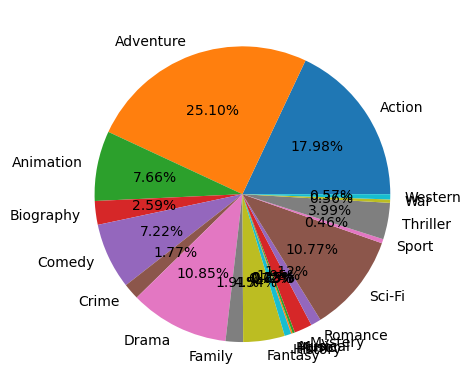

Action 17.98
Adventure 25.10
Animation 7.66
Biography 2.59
Comedy 7.22
Crime 1.77
Drama 10.85
Family 1.91
Fantasy 4.54
History 0.72
Horror 0.03
Music 0.15
Musical 0.25
Mystery 1.95
Romance 1.12
Sci-Fi 10.77
Sport 0.46
Thriller 3.99
War 0.36
Western 0.57


In [194]:
import matplotlib.pyplot as plt
import numpy as np

movie_genre = pd.read_sql_query('select * from IMDB inner join genre on IMDB.Movie_id = genre.Movie_id' ,db)

# Replacing empty values in budget with 0
movie_genre['Budget'].replace('',0 , inplace=True)

# Replacing empty values in genre with Nan
movie_genre['genre'].replace('',np.nan , inplace=True)

# Dropping rows in Null values in genre or budget columns
movie_genre.dropna(subset=['genre' , 'Budget'] , inplace=True)

movie_genre['Budget'] = movie_genre['Budget'].astype(int)

genre_budget = movie_genre.groupby("genre")["Budget"].sum()
genre_budget

genre = np.array(list(genre_budget.index))
budget = np.array(list(genre_budget.values))

plt.pie(budget , labels=genre , autopct='%0.2f%%')
plt.show()

percent = np.true_divide(budget,budget.sum())*100
for i in range(len(budget)):
    print(genre[i],format(percent[i],'0.2f'))








## IMDB genre earning

Problem statement
IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.

Find out the percentage of the total earning for each genre in IMDB Movie Dataset?Plot the pie chart.

Print the genre and percentage of movies total earning present in that genre with 2 decimal place after rounding off.

Note: Movies has multiple genres, so calculate the percentage for each genre.Total Earning=Domestic earning + WorldWide earning.

Output Format:
genre_1 percent_1
genre_2 percent_2
. . .
. . .


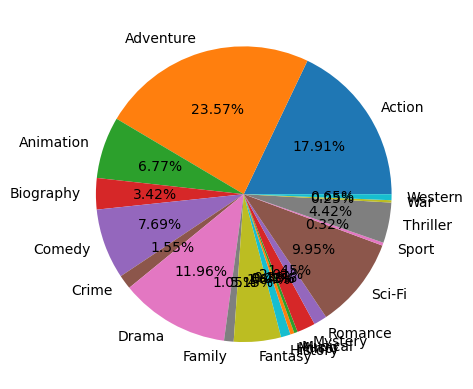

Action 17.91
Adventure 23.57
Animation 6.77
Biography 3.42
Comedy 7.69
Crime 1.55
Drama 11.96
Family 1.05
Fantasy 5.15
History 1.04
Horror 0.01
Music 0.43
Musical 0.38
Mystery 2.01
Romance 1.45
Sci-Fi 9.95
Sport 0.32
Thriller 4.42
War 0.25
Western 0.65


In [213]:
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_sql_query('select * from IMDB inner join genre on IMDB.Movie_id = genre.Movie_id inner join earning on earning.Movie_id = genre.Movie_id' ,db)

# Making a total profit column 
data['total'] = data['Domestic'] + data['Worldwide']

# Replacing empty values in genre with Nan
data['genre'].replace('',np.nan , inplace=True)

# Dropping rows in Null values in genre or total columns
data.dropna(subset=['genre' , 'total'] , inplace=True)

# Making values in total column to int
data['total'] = data['total'].astype(int)

# Grouping every genre by their total earnings
genre_earning = data.groupby("genre")["total"].sum()

genre = np.array(list(genre_earning.index))
earning = np.array(list(genre_earning.values))

plt.pie(earning , labels=genre , autopct='%0.2f%%')
plt.show()

percent = np.true_divide(earning,earning.sum())*100
for i in range(len(earning)):
    print(genre[i],format(percent[i],'0.2f'))


In [221]:
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_sql_query('select * from IMDB inner join genre on IMDB.Movie_id = genre.Movie_id inner join earning on earning.Movie_id = genre.Movie_id' ,db)

# Replacing empty values in genre with Nan
data['genre'].replace('',np.nan , inplace=True)

# Dropping rows in Null values in genre or total columns
data.dropna(subset=['genre'] , inplace=True)

data = data[(data['genre'] == 'Sci-Fi') | (data['genre'] == 'Mystery')]
data = data[data['Rating'] >= 8]

data.groupby('Title')['genre'].sum()

print('Arrival (2016)')

Arrival (2016)
